# Herron Topic 2 - Practice (Monday 2:45 PM, Section 3)

## Announcements

- I will finish grading projects this week/weekend
- Quiz 5 due Friday at 11:59 PM
    - A handful of students have submitted identical quizzes
    - Quizzes are individual efforts
    - Do not assume it is hard to for me to compare quiz and project submissions
- DataCamp 20,000 XP due *next* Friday at 11:59 PM
- Attendance and participation account for 5% of your grade

##  Practice

### Implement the SMA(20) strategy with Bitcoin from the lecture notebook

Try to create the `btc` data frame in one code cell with one assignment (i.e., one `=`).

***After class, I wrapped this chained operation into a function named `sma()`.***
This will make it easier to try different windows and separate the trading strategies in this notebook.

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [51]:
%config InlineBackend.figure_format = 'retina'
%precision 4
pd.options.display.float_format = '{:.4f}'.format

In [52]:
import yfinance as yf

In [53]:
btc = (
    yf.download(tickers='BTC-USD', progress=False)
    .assign(Date = lambda x: x.index.tz_localize(None))
    .set_index('Date')
    .rename_axis(columns='Variable')
)

In [54]:
def sma(df, n=20):
    return (
        df
        .assign(
            Return = lambda x: x['Adj Close'].pct_change(),
            SMA20 = lambda x: x['Adj Close'].rolling(n).mean(),
            Position = lambda x: np.select(
                condlist=[
                    x['Adj Close'].shift() > x['SMA20'].shift(), 
                    x['Adj Close'].shift() <= x['SMA20'].shift()
                ],
                choicelist=[
                    1, 
                    0
                ],
                default=np.nan
            ),
            Strategy = lambda x: x['Position'] * x['Return']
        )
    )

In [55]:
btc_sma = btc.pipe(sma, n=20)

btc_sma.tail()

Variable,Open,High,Low,Close,Adj Close,Volume,Return,SMA20,Position,Strategy
Date,,,,,,,,,,
2023-03-09,21720.0801,21802.7168,20210.3066,20363.0215,20363.0215,30364664171,-0.0624,23198.9943,0.0000,-0.0000
2023-03-10,20367.0020,20370.5957,19628.2539,20187.2441,20187.2441,39578257695,-0.0086,22976.2927,0.0000,-0.0000
2023-03-11,20187.8770,20792.5254,20068.6602,20632.4102,20632.4102,30180288176,0.0221,22791.5311,0.0000,0.0000
2023-03-12,20628.0293,22185.0312,20448.8066,22163.9492,22163.9492,29279035521,0.0742,22658.2711,0.0000,0.0000
2023-03-13,22178.5801,24427.3906,21918.1992,24229.8164,24229.8164,54919491584,0.0932,22647.9442,0.0000,0.0000


### How does SMA(20) outperform buy-and-hold with this sample?

Consider the following:

1. Does SMA(20) avoid the worst performing days? How many of the worst 20 days does SMA(20) avoid? Try the `.sort_values()` or `.nlargest()` method.
1. Does SMA(20) preferentially avoid low-return days? Try to combine the `.groupby()` method and `pd.qcut()` function.
1. Does SMA(20) preferentially avoid high-volatility days? Try to combine the `.groupby()` method and `pd.qcut()` function.

By change, the SMA(20) strategy avoids all but three of the worst days.

In [56]:
btc_sma.sort_values('Return')[['Position']].head(20).value_counts()

Position
0.0000      17
1.0000       3
dtype: int64

However, SMA(20) does not avoid the best days, again by chance.

In [57]:
btc_sma.sort_values('Return', ascending=False)[['Position']].head(20).value_counts()

Position
0.0000      10
1.0000      10
dtype: int64

In [58]:
btc_sma

Variable,Open,High,Low,Close,Adj Close,Volume,Return,SMA20,Position,Strategy
Date,,,,,,,,,,
2014-09-17,465.8640,468.1740,452.4220,457.3340,457.3340,21056800,NaN,NaN,NaN,NaN
2014-09-18,456.8600,456.8600,413.1040,424.4400,424.4400,34483200,-0.0719,NaN,NaN,NaN
2014-09-19,424.1030,427.8350,384.5320,394.7960,394.7960,37919700,-0.0698,NaN,NaN,NaN
2014-09-20,394.6730,423.2960,389.8830,408.9040,408.9040,36863600,0.0357,NaN,NaN,NaN
2014-09-21,408.0850,412.4260,393.1810,398.8210,398.8210,26580100,-0.0247,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-03-09,21720.0801,21802.7168,20210.3066,20363.0215,20363.0215,30364664171,-0.0624,23198.9943,0.0000,-0.0000
2023-03-10,20367.0020,20370.5957,19628.2539,20187.2441,20187.2441,39578257695,-0.0086,22976.2927,0.0000,-0.0000
2023-03-11,20187.8770,20792.5254,20068.6602,20632.4102,20632.4102,30180288176,0.0221,22791.5311,0.0000,0.0000


The SMA(20) strategy has a slight edge in picking high-return days, again by chance.

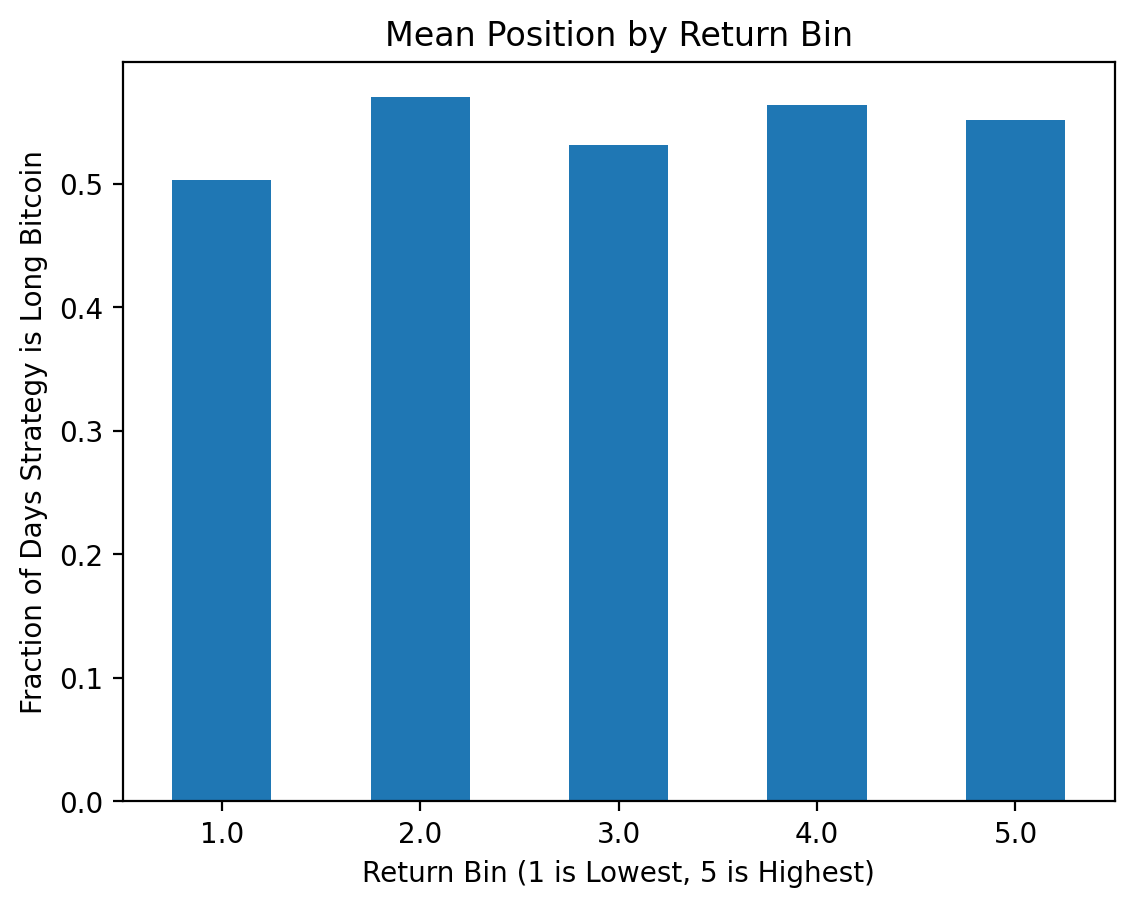

In [59]:
(
    btc_sma
    .assign(q5_return = lambda x: 1 + pd.qcut(x['Return'], q=5, labels=False))
    .groupby('q5_return')
    ['Position']
    .mean()
    .plot(kind='bar')
)

plt.xticks(rotation=0)
plt.xlabel('Return Bin (1 is Lowest, 5 is Highest)')
plt.ylabel('Fraction of Days Strategy is Long Bitcoin')
plt.title('Mean Position by Return Bin')
plt.show()

However, the SMA(20) *does* avoid the high volatility days that create [volatility drag](https://www.kitces.com/blog/volatility-drag-variance-drain-mean-arithmetic-vs-geometric-average-investment-returns/).

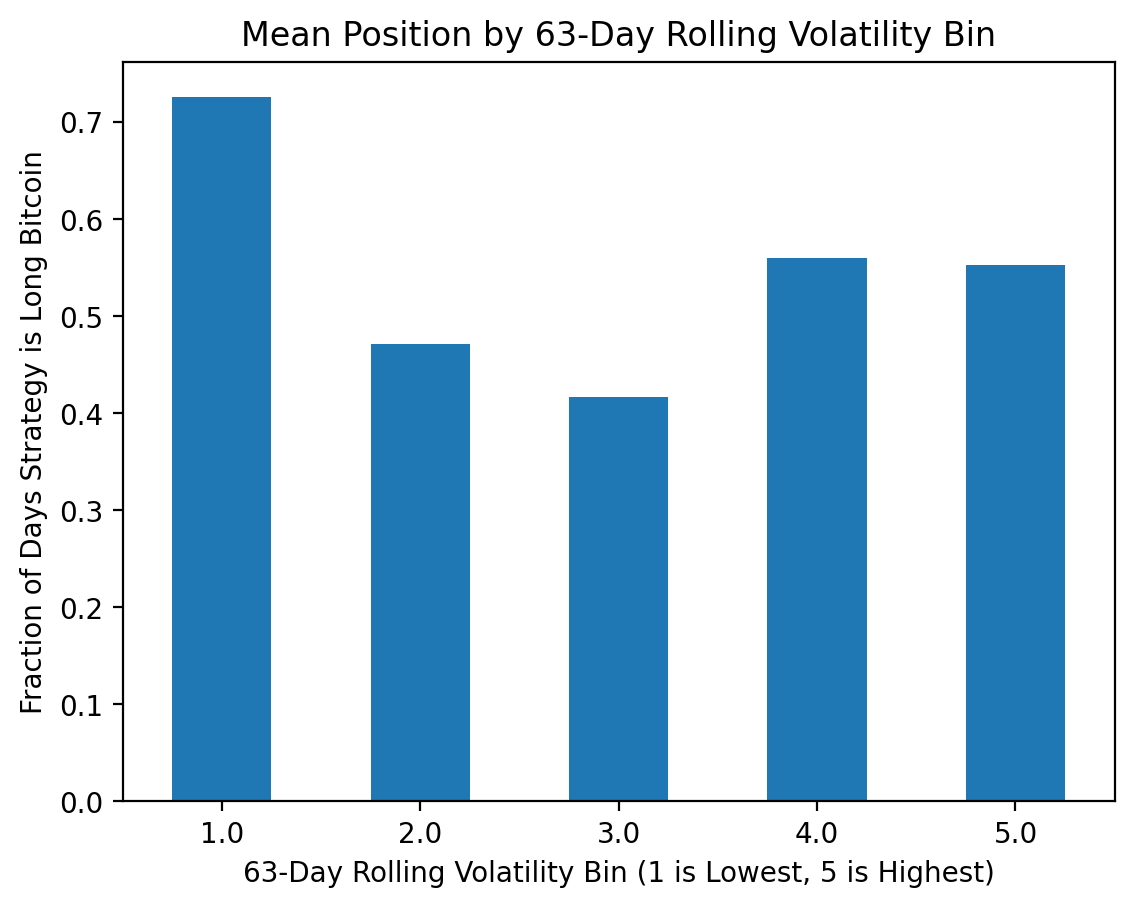

In [60]:
(
    btc_sma
    .assign(
        Volatility = lambda x: x['Return'].rolling(63).std(),
        q5_volatility = lambda x: 1 + pd.qcut(x['Volatility'], q=5, labels=False)
    )
    .groupby('q5_volatility')
    ['Position']
    .mean()
    .plot(kind='bar')
)

plt.xticks(rotation=0)
plt.xlabel('63-Day Rolling Volatility Bin (1 is Lowest, 5 is Highest)')
plt.ylabel('Fraction of Days Strategy is Long Bitcoin')
plt.title('Mean Position by 63-Day Rolling Volatility Bin')
plt.show()

Recall that $Arith\ Mean \approx Geom\ Mean + \frac{\sigma^2}{2}$, so avoiding high volatility (high variance) days, reduced the drag on the  cumulative returns that intermediate-term and long-term investors care about!

In [61]:
(
    btc_sma
    .groupby('Position')
    ['Return']
    .agg(['std', 'mean', lambda x: (1 + x).prod()**(1 / x.count()) - 1])
    .mul(100)
    .rename(columns={'std': 'Volatility', 'mean': 'Arith Mean', '<lambda_0>': 'Geom Mean'})
)

,Volatility,Arith Mean,Geom Mean
Position,,,
0.0000,4.1520,0.0434,-0.0451
1.0000,3.4918,0.3547,0.2945


### Implement the SMA(20) strategy with the market factor from French

We need to impute a market price before we calculate SMA(20).

### How often does SMA(20) outperform buy-and-hold with 10-year rolling windows?

### Implement a long-only BB(20, 2) strategy with Bitcoin

More on Bollinger Bands [here](https://www.bollingerbands.com/bollinger-bands) and [here](https://www.bollingerbands.com/bollinger-band-rules).
In short, Bollinger Bands are bands around a trend, typically defined in terms of simple moving averages and volatilities.
Here, long-only BB(20, 2) implies we have upper and lower bands at 2 standard deviations above and below SMA(20):

1. Buy when the closing price crosses LB(20) from below, where LB(20) is SMA(20) minus 2 sigma
1. Sell when the closing price crosses UB(20) from above, where UB(20) is SMA(20) plus 2 sigma
1. No short-selling

The long-only BB(20, 2) is more difficult to implement than the long-only SMA(20) because we need to track buys and sells.
For example, if the closing price is between LB(20) and BB(20), we need to know if our last trade was a buy or a sell.
Further, if the closing price is below LB(20), we can still be long because we sell when the closing price crosses UB(20) from above.

***After class, I wrapped this chained operation into a function named `bb()`.***
This will make it easier to try different windows and separate the trading strategies in this notebook.

In [62]:
def bb(df, n=20, m=2):
    return (
        df
        .assign(
            Date = lambda x: x.index.tz_localize(None),
            Return = lambda x: x['Adj Close'].pct_change(),
            SMA = lambda x: x['Adj Close'].rolling(n).mean(),
            SMV = lambda x: x['Adj Close'].rolling(n).std(),
            LB = lambda x: x['SMA'] - m*x['SMV'],
            UB = lambda x: x['SMA'] + m*x['SMV'],
            Position_with_nan = lambda x: np.select(
                condlist=[
                    (x['Adj Close'].shift(1) >= x['LB'].shift(1)) & (x['Adj Close'].shift(2) < x['LB'].shift(2)), 
                    (x['Adj Close'].shift(1) <= x['UB'].shift(1)) & (x['Adj Close'].shift(2) > x['UB'].shift(2)),
                ],
                choicelist=[
                    1, 
                    0
                ],
                default=np.nan
            ),
            Position = lambda x: x['Position_with_nan'].fillna(method='ffill'),
            Strategy = lambda x: x['Position'] * x['Return']
        )
    )

In [64]:
btc_bb = btc.pipe(bb)

btc_bb.tail()

Variable,Open,High,Low,Close,Adj Close,Volume,Date,Return,SMA,SMV,LB,UB,Position_with_nan,Position,Strategy
Date,,,,,,,,,,,,,,,
2023-03-09,21720.0801,21802.7168,20210.3066,20363.0215,20363.0215,30364664171,2023-03-09,-0.0624,23198.9943,1109.3502,20980.2939,25417.6948,NaN,1.0000,-0.0624
2023-03-10,20367.0020,20370.5957,19628.2539,20187.2441,20187.2441,39578257695,2023-03-10,-0.0086,22976.2927,1243.5315,20489.2298,25463.3556,NaN,1.0000,-0.0086
2023-03-11,20187.8770,20792.5254,20068.6602,20632.4102,20632.4102,30180288176,2023-03-11,0.0221,22791.5311,1305.1707,20181.1896,25401.8725,NaN,1.0000,0.0221
2023-03-12,20628.0293,22185.0312,20448.8066,22163.9492,22163.9492,29279035521,2023-03-12,0.0742,22658.2711,1219.4207,20219.4297,25097.1125,1.0000,1.0000,0.0742
2023-03-13,22178.5801,24427.3906,21918.1992,24229.8164,24229.8164,54919491584,2023-03-13,0.0932,22647.9442,1204.3517,20239.2409,25056.6476,NaN,1.0000,0.0932


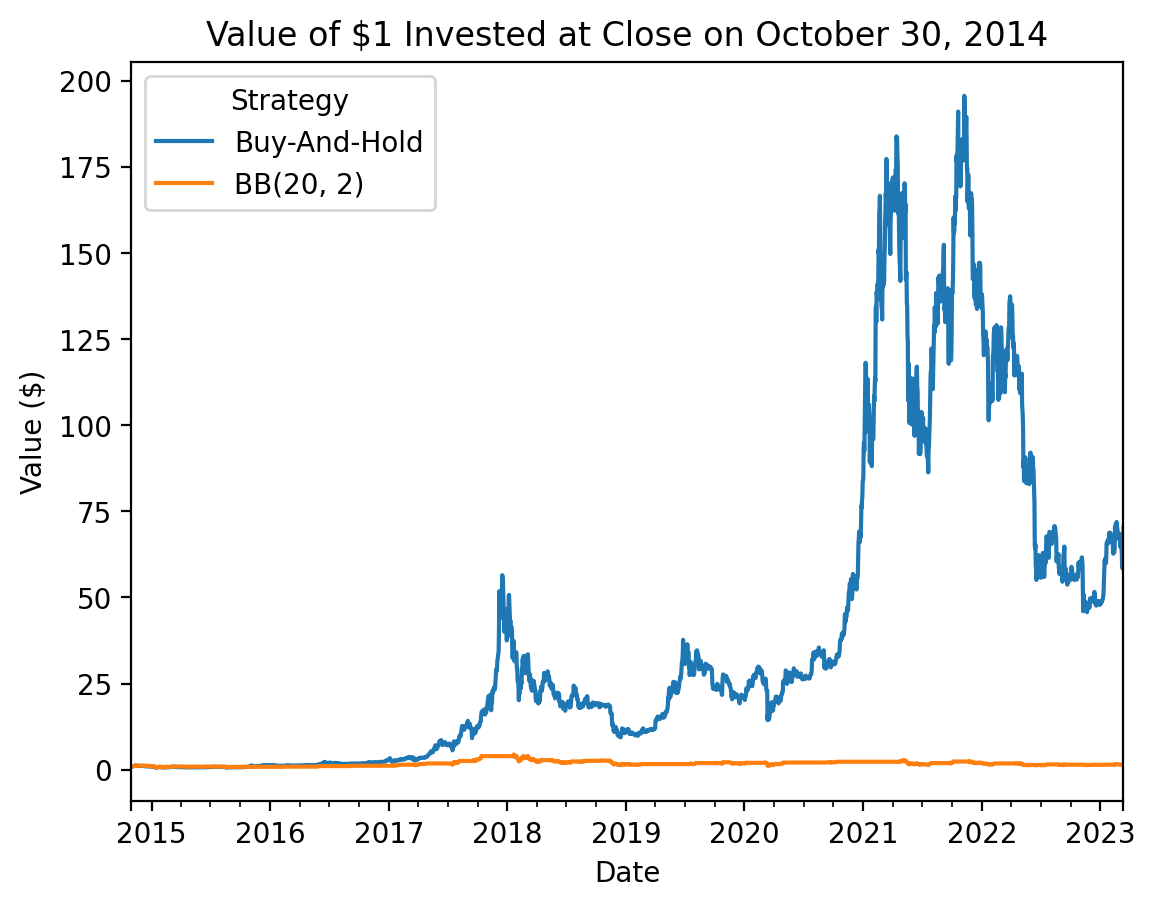

In [65]:
_ = btc_bb[['Return', 'Strategy']].dropna()

(
    _
    .add(1)
    .cumprod()
    .rename_axis(columns='Strategy')
    .rename(columns={'Return': 'Buy-And-Hold', 'Strategy': 'BB(20, 2)'})
    .plot()
)
plt.ylabel('Value ($)')
plt.title(f'Value of $1 Invested at Close on {_.index[0] - pd.offsets.Day(1):%B %d, %Y}')
plt.show()

For an asset that we know has large positive returns over the sample, "time in the market" beats "timing the market".

### Implement a long-short RSI(14) strategy with Bitcoin

From [Fidelity](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/rsi):

> The Relative Strength Index (RSI), developed by J. Welles Wilder, is a momentum oscillator that measures the speed and change of price movements. The RSI oscillates between zero and 100. Traditionally the RSI is considered overbought when above 70 and oversold when below 30. Signals can be generated by looking for divergences and failure swings. RSI can also be used to identify the general trend.

Here is the RSI formula: $RSI(n) = 100 - \frac{100}{1 + RS(n)}$, where $RS(n) = \frac{SMA(U, n)}{SMA(D, n)}$.
For "up days", $U = \Delta Adj\ Close$ and $D = 0$, and, for "down days", $U = 0$ and $D = - \Delta Adj\ Close$.
Therefore, $U$ and $D$ are always non-negative.
We can learn more about RSI [here](https://en.wikipedia.org/wiki/Relative_strength_index).

We will implement a long-short RSI(14) as follows:

1. Enter a long position when  the RSI crosses 30 from below, and exit the position when the RSI crosses 50 from below
1. Enter a short position when the RSI crosses 70 from above, and exit the position when the RSI crosses 50 from above

***After class, I replace the `np.where()` for `U` and `D` with `np.select()` for (1) consistency and (2) to better handle missing observations.***

In [72]:
def rsi(df, n=14, lb=30, mb=50, ub=70):
    return df.assign(
        Return = lambda x: x['Adj Close'].pct_change(),
        Diff = lambda x: x['Adj Close'].diff(),
        U = lambda x: np.select(
            condlist=[x['Diff'] >= 0, x['Diff'] < 0],
            choicelist=[x['Diff'], 0],
            default=np.nan
        ),
        D = lambda x: np.select(
            condlist=[x['Diff'] <= 0, x['Diff'] > 0],
            choicelist=[-1 * x['Diff'], 0],
            default=np.nan
        ),
        SMAU = lambda x: x['U'].rolling(n).mean(),
        SMAD = lambda x: x['D'].rolling(n).mean(),
        RS = lambda x: x['SMAU'] / x['SMAD'],
        RSI = lambda x: 100 - 100 / (1 + x['RS']),
        Position_with_nan = lambda x: np.select(
            condlist=[
                (x['RSI'].shift(1) >= lb) & (x['RSI'].shift(2) < lb), 
                (x['RSI'].shift(1) >= mb) & (x['RSI'].shift(2) < mb),
                (x['RSI'].shift(1) <= ub) & (x['RSI'].shift(2) > ub), 
                (x['RSI'].shift(1) <= mb) & (x['RSI'].shift(2) > mb),
            ],
            choicelist=[
                1, 
                0,
                -1,
                0
            ],
            default=np.nan
        ),
        Position = lambda x: x['Position_with_nan'].fillna(method='ffill'),
        Strategy = lambda x: x['Position'] * x['Return']
    )



In [75]:
btc_rsi = rsi(btc)

btc_rsi.tail()

Variable,Open,High,Low,Close,Adj Close,Volume,Return,Diff,U,D,SMAU,SMAD,RS,RSI,Position_with_nan,Position,Strategy
Date,,,,,,,,,,,,,,,,,
2023-03-09,21720.0801,21802.7168,20210.3066,20363.0215,20363.0215,30364664171,-0.0624,-1355.0586,0.0000,1355.0586,69.0857,325.1193,0.2125,17.5253,NaN,1.0000,-0.0624
2023-03-10,20367.0020,20370.5957,19628.2539,20187.2441,20187.2441,39578257695,-0.0086,-175.7773,0.0000,175.7773,69.0857,284.1487,0.2431,19.5580,NaN,1.0000,-0.0086
2023-03-11,20187.8770,20792.5254,20068.6602,20632.4102,20632.4102,30180288176,0.0221,445.1660,445.1660,0.0000,100.8832,282.5236,0.3571,26.3123,NaN,1.0000,0.0221
2023-03-12,20628.0293,22185.0312,20448.8066,22163.9492,22163.9492,29279035521,0.0742,1531.5391,1531.5391,0.0000,182.7190,282.5236,0.6467,39.2739,NaN,1.0000,0.0742
2023-03-13,22178.5801,24427.3906,21918.1992,24229.8164,24229.8164,54919491584,0.0932,2065.8672,2065.8672,0.0000,330.2810,279.7849,1.1805,54.1386,1.0000,1.0000,0.0932


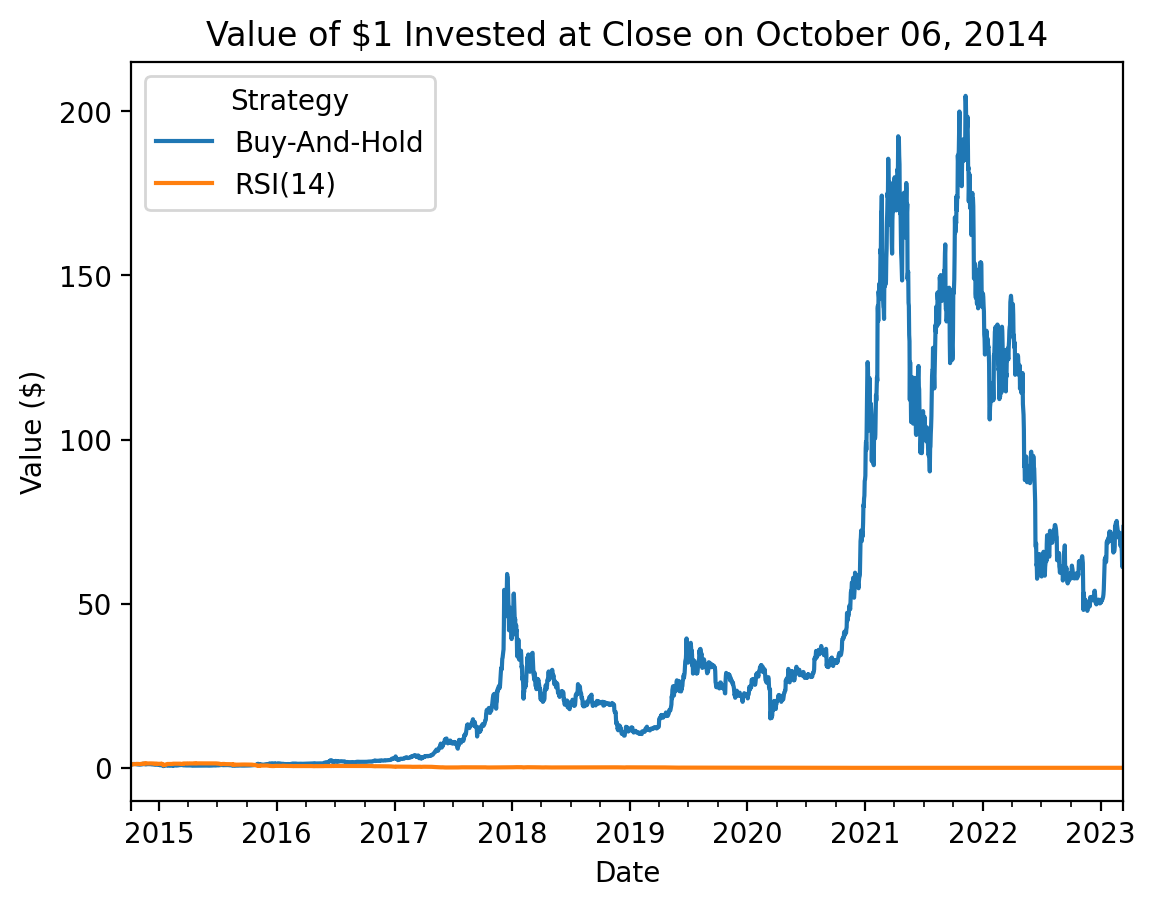

In [76]:
_ = btc_rsi[['Return', 'Strategy']].dropna()

(
    _
    .add(1)
    .cumprod()
    .rename_axis(columns='Strategy')
    .rename(columns={'Return': 'Buy-And-Hold', 'Strategy': 'RSI(14)'})
    .plot()
)
plt.ylabel('Value ($)')
plt.title(f'Value of $1 Invested at Close on {_.index[0] - pd.offsets.Day(1):%B %d, %Y}')
plt.show()

We can compare all three!
Shorting Bitcoin has been dangerous, as the poor returns on RSI(14) show!

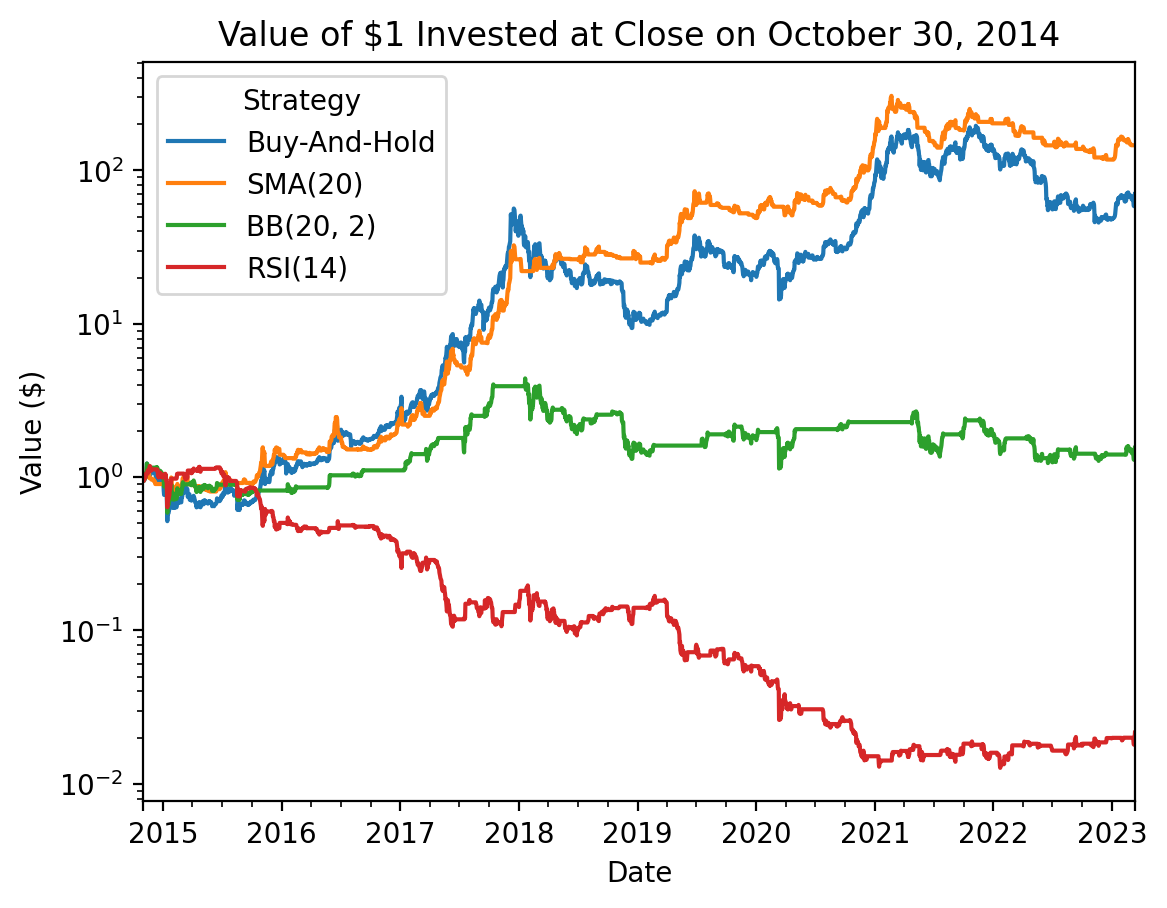

In [84]:
_ = (
    btc_sma[['Return', 'Strategy']]
    .join(
        btc_bb[['Strategy']].add_suffix('_BB'), 
    )
    .join(
        btc_rsi[['Strategy']].add_suffix('_RSI'), 
    )
    .dropna()
)


(
    _
    .add(1)
    .cumprod()
    .rename_axis(columns='Strategy')
    .rename(columns=
            {
                'Return': 'Buy-And-Hold', 
                'Strategy': 'SMA(20)',
                'Strategy_BB': 'BB(20, 2)',
                'Strategy_RSI': 'RSI(14)',
            }
           )
    .plot()
)
plt.semilogy()
plt.ylabel('Value ($)')
plt.title(f'Value of $1 Invested at Close on {_.index[0] - pd.offsets.Day(1):%B %d, %Y}')
plt.show()